In [51]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import odeint

In [52]:
def area_from_pressure(p1,Dt):

    k= 1.1361
    k2= 1.0423
    R= 228.4

    #p1= 15640880.91

    pR= 0.5772057472 
    pt= pR*p1
    pa= 101325.0
    #Dt= 0.00396875
    
    At = np.pi*((Dt/2.0)**2)
    
    C1= ((k+1.0)/2.0)**(1.0/(k-1.0))
    C2= ((pa/p1)**(1.0/k))
    C3= np.sqrt( ((k+1.0)/(k-1.0))*(1.0-((pa/p1)**((k-1.0)/k))) )
    C4= C1*C2*C3
    Ae = At/C4
    
    De = np.sqrt((Ae/np.pi))
    De_cm = De *100

    ER= Ae/At

    return Ae, ER
    
Ae, Er = area_from_pressure(15640880.91,0.00396875)
    
print(Ae)
#print(De)
print(Er)

0.000241354219021925
19.510011631850936


In [53]:
# compute p1

pa = 101325.0 # atmospherica pressure
Dt = float(input('Throat Diameter(m)'))#0.00396875 # diameter of the throat
At = np.pi*((Dt/2.0)**2)

pR= 0.5772057472 # relative pressure

k = 1.1361 # some property of the fuel

k2= 1.0423 # some comment here

factor1 = 2.0*(k2**2)/(k2-1.0)
factor2 = (2.0/(k2+1.0))**((k2+1.0)/(k2-1.0))
factor3 = (1.0-(pR**((k2-1.0)/k2)))

C5 = np.sqrt(factor1*factor2*factor3) + pR

Throat Diameter(m) 0.00436562


In [54]:
filename = "38mm8(0.1719C)_apend_10.0%" # change
prefix = "/Users/augustzentner/Downloads/RocketTestStand-main/Log Rocket Data/"
suffix = ".TXT"

filename = prefix + filename + suffix

print(' Using file : ',filename)

time, thrust = np.loadtxt(filename, delimiter=',', unpack=True)

print(' time = ',time)
print(' thrust = ',thrust)

 Using file :  /Users/augustzentner/Downloads/RocketTestStand-main/Log Rocket Data/38mm8(0.1719C)_apend_10.0%.TXT
 time =  [0.    0.081 0.175 0.268 0.361 0.454 0.547 0.64  0.734 0.826 0.919 1.012
 1.105 1.199 1.292 1.385 1.49 ]
 thrust =  [ 17.808  40.668  63.267  86.192 106.066 121.006 133.792 146.317 160.361
 172.709 178.076 177.733 166.928 139.153  96.201  51.947  17.808]


In [55]:
def interp_func_th_program(time,thrust):
    
    interp_func_th = interp1d(time, thrust)
    return interp_func_th

In [56]:
def get_mass_derivative_constant(interp_func_th,t_initial,t_final, propellant_mass):
    '''
    Get the constant in the mass derivative.
    '''
    t_initial = np.min(time)
    t_final = np.max(time)
    
    n_step_max=10000
    
    [total_impulse_2,impulse_error] = integrate.quad(interp_func_th,t_initial,t_final,limit=n_step_max)
    mass_derivative_constant = (1.0/(propellant_mass)) * total_impulse_2
    
    return mass_derivative_constant

In [57]:
def mass_derivative(interp_func_th, mass_derivative_constant, time):
    
    dmdt = interp_func_th(time)/mass_derivative_constant
    return dmdt

In [66]:
# calculate p1

t_initial = np.min(time)
t_final = np.max(time)

propellant_mass_g = 174.0 # in grams
propellant_mass = propellant_mass_g * 0.001

p1 = (thrust/At + pa)/C5
pt = pR * p1

print(p1)

# compute dm/dt for this rocket

fun_thrust = interp_func_th_program(time,thrust)
mass_constant = get_mass_derivative_constant(fun_thrust,np.min(time),np.max(time),propellant_mass)
dmdt = mass_derivative(fun_thrust,mass_constant,time)


[1058720.35131617 2311125.46279972 3549231.4608057  4805197.6541898
 5894012.1417499  6712513.12012104 7413005.3228957  8099198.41219279
 8868611.24621182 9545107.23556435 9839143.02879848 9820351.47353869
 9228390.08991753 7706712.40087747 5353549.48099814 2929055.35135715
 1058720.35131617]


/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_36841/970252258.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  [total_impulse_2,impulse_error] = integrate.quad(interp_func_th,t_initial,t_final,limit=n_step_max)


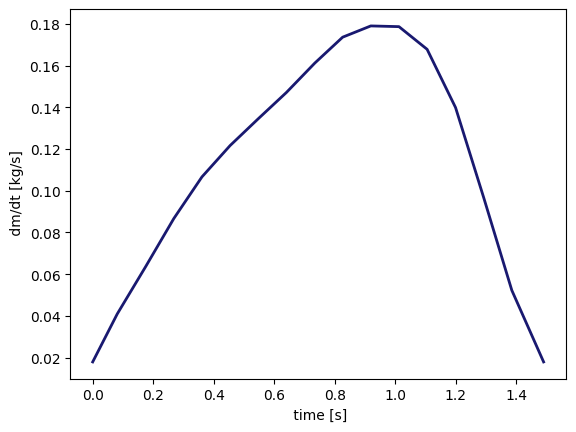

In [59]:
#plot some stuff to check it
fig = plt.figure()

plt.plot(time,dmdt,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' dm/dt [kg/s]')

plt.show()

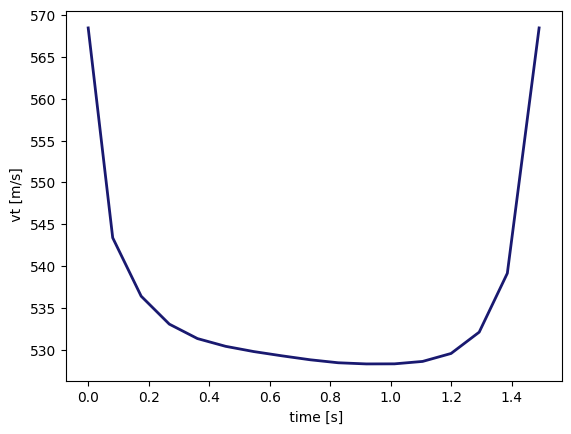

In [60]:
# compute vt

vt = (thrust - (pt - pa)*At)/dmdt

fig = plt.figure()

plt.plot(time,vt,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' vt [m/s]')

plt.show()

In [61]:
# define a function to compute vx

def vx_from_vt(vt,p1,k,pa):
    #
    
    f1 = (k+1.0)/(k-1.0)
    pwr = (k-1.0)/k
    f2 = (1.0 - ((pa/p1)**pwr) )
          
    vx = vt*np.sqrt(f1*f2)
          
    return vx

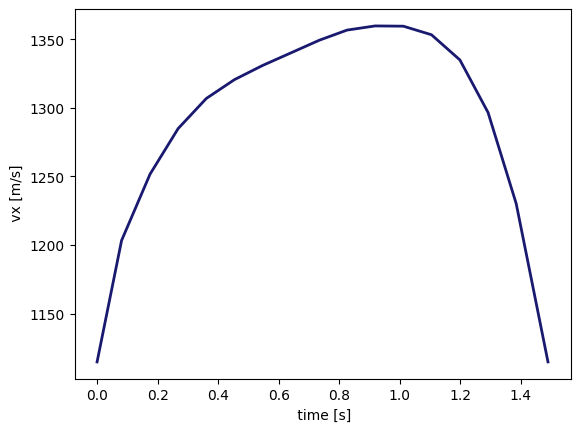

In [62]:
# compute vx

vx = vx_from_vt(vt,p1,k,pa)

fig = plt.figure()

plt.plot(time,vx,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' vx [m/s]')

plt.show()

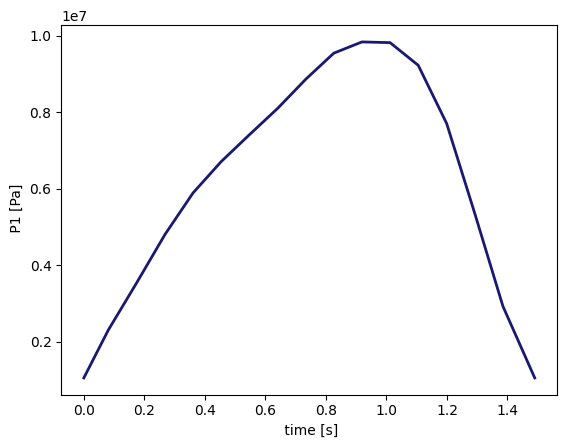

In [63]:
fig = plt.figure()

plt.plot(time,p1,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' P1 [Pa]')

plt.show()

In [64]:
# compute exit pressure given area

def pressure_zero_function(p1in, Dt, Areatrial):
    #
    
    Ae, Er = area_from_pressure(p1in,Dt)
    
    value = Ae - Areatrial
    
    return value

pevals = np.array([])

Ae, Er = area_from_pressure(p1,Dt)

AreaTrial = 2.4e-4 # this is the trial area that we are trying

extra_args = (Dt,AreaTrial)

for pressure in p1:
    
    p1zero = brentq( pressure_zero_function, 0.1*pressure, 100.0*pressure, args=extra_args )
    
    #print(' p1z = ',p1zero,' pressure = ',pressure)
    
    pevals = np.append(pevals,pressure*pa/p1zero) # convert from ratio to true pe
    
# plot pe values

pe=pevals

print(pe/p1)


fig = plt.figure()

plt.plot(p1,pevals,linewidth=2.0,color='midnightblue')

plt.xlabel(' p1 [Pa]')
plt.ylabel(' pe [Pa]')

plt.show()

NameError: name 'brentq' is not defined

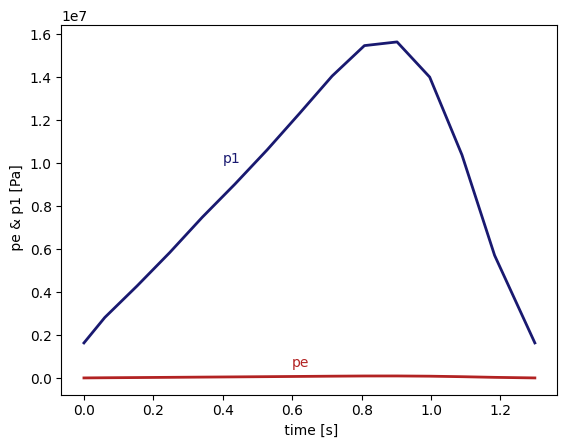

102035.27848753748


In [35]:
# plot pe values

fig = plt.figure()

plt.plot(time,p1,linewidth=2.0,color='midnightblue')
plt.plot(time,pevals,linewidth=2.0,color='firebrick')

plt.text(0.4,1.0e7,'p1',color='midnightblue')
plt.text(0.6,0.05e7,'pe',color='firebrick')

plt.xlabel(' time [s]')
plt.ylabel(' pe & p1 [Pa]')

plt.show()

print(np.max(pevals))

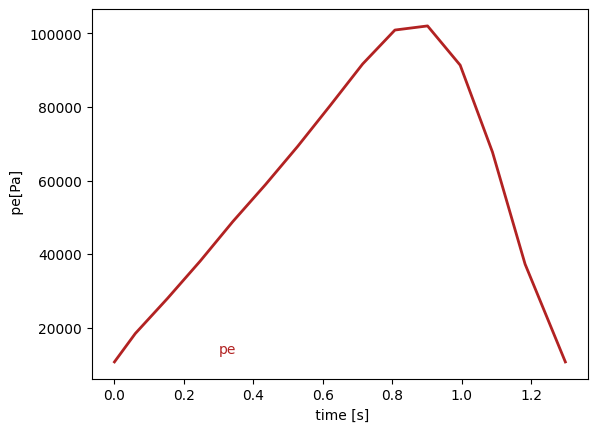

In [217]:
# plot pe values

fig = plt.figure()

plt.plot(time,pevals,linewidth=2.0,color='firebrick')

plt.text(0.3,13000, 'pe',color='firebrick')

plt.xlabel(' time [s]')
plt.ylabel(' pe[Pa]')

plt.show()

In [218]:
print(pe)

[ 10691.59785531  18405.16031921  27978.67861409  38103.1347673
  48843.39587362  58888.2817239   69307.6669347   80330.74857426
  91686.38218639 100914.80753704 102035.27848754  91368.96586927
  67745.23484511  37275.43063791  10691.59785531]


In [219]:
def vx_from_vt_and_pe(vt,p1,k,pe):
    #
    
    f1 = (k+1.0)/(k-1.0)
    pwr = (k-1.0)/k
    f2 = (1.0 - ((0.00652349)**pwr) )
          
    vx2 = vt*np.sqrt(f1*f2)
          
    return vx2

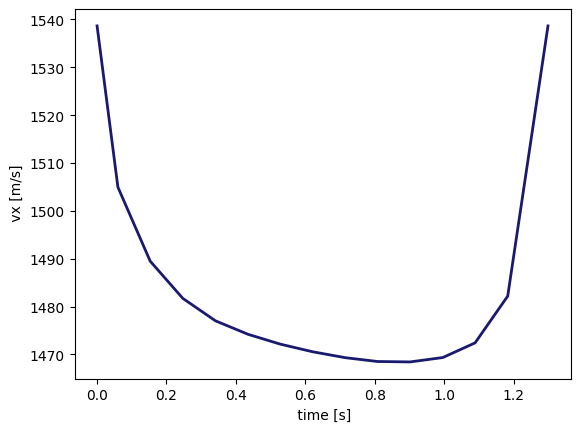

In [220]:

vx2 = vx_from_vt_and_pe(vt,p1,k,pe)

fig = plt.figure()

plt.plot(time,vx2,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' vx [m/s]')

plt.show()

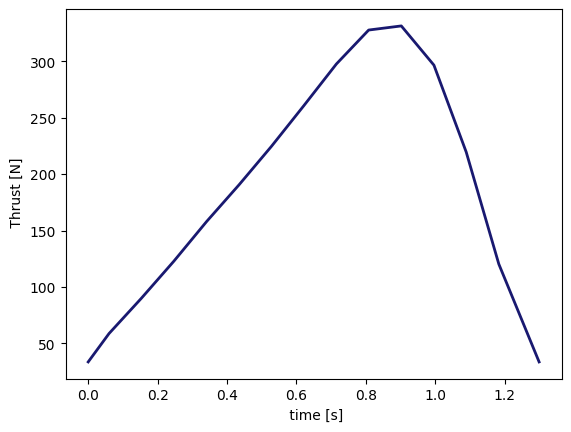

In [221]:

F1= dmdt*vx2 
F2= (pe-pa)*(At)
F= F1+F2

fig = plt.figure()

plt.plot(time,F,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' Thrust [N]')

plt.show()

[151.77805455 150.77708097 150.31750758 150.08636826 149.94708837
 149.8632305  149.80213224 149.7548649  149.71812727 149.69439426
 149.69180653 149.71902938 149.8100867  150.10048216 151.77805455]


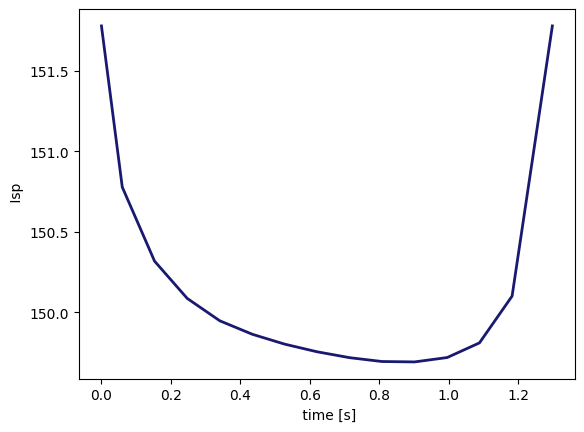

In [262]:
Isp = (F/dmdt)
Isp = Isp/9.81
print(Isp)

fig = plt.figure()

plt.plot(time,Isp,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' Isp')

plt.show()

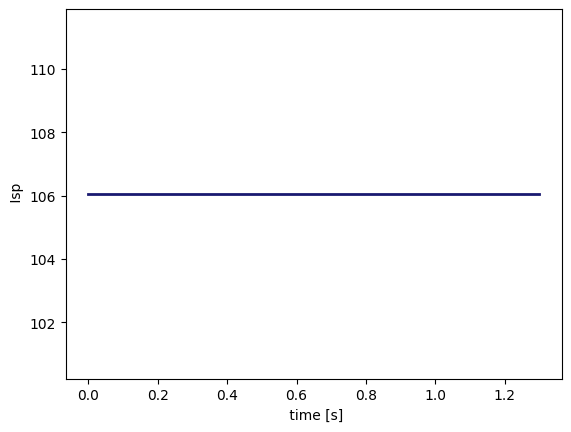

106.05661420807633


In [238]:
Isp_i = (thrust/dmdt)/9.81

fig = plt.figure()

plt.plot(time,Isp_i,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' Isp')

plt.show()

print (Isp_i[1])

In [263]:
################# I believe the 115 value is incorrect ###############

n_step_max = 5000

interp_func_th2 = interp1d(time, F)

grav_int = 9.81*(t_final)

Impulse2, error= integrate.quad(interp_func_th2, t_initial, t_final, limit=n_step_max)
Isp_avg3 = ((Impulse2/propellant_mass)/grav_int)
print(t_final)
print(Impulse)
#print(Isp_avg3)


interp_func_dmdt = interp1d(time, dmdt)

m2, error= integrate.quad(interp_func_dmdt, t_initial, t_final, limit=n_step_max)
dmdt_avg = m2/t_final

F_avg = Impulse2/t_final
IspF = ((F_avg/dmdt_avg)/9.81)
print(IspF)

1.299
255.78560510303632
149.85039059445742


/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_17459/2509915233.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Impulse2, error= integrate.quad(interp_func_th2, t_initial, t_final, limit=n_step_max)
/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_17459/2509915233.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  m2, error= integrate.quad(interp_func_dmdt, t_initial, t_final, limit=n_step_max)


In [246]:
interp_func_isp = interp1d(time, Isp)

Isp_avg, error= integrate.quad(interp_func_isp, t_initial, t_final, limit=n_step_max)
Isp_avg = Isp_avg/t_final
print(Isp_avg)

150.0594777883013


/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_17459/1171146801.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Isp_avg, error= integrate.quad(interp_func_isp, t_initial, t_final, limit=n_step_max)


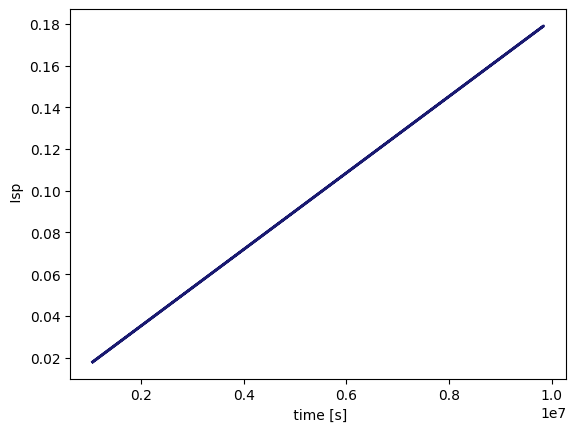

In [65]:
fig = plt.figure()

plt.plot(p1,dmdt,linewidth=2.0,color='midnightblue')

plt.xlabel(' time [s]')
plt.ylabel(' Isp')

plt.show()